# 导入鸢尾花数据

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
type(load_iris())


X = load_iris().data
Y = load_iris().target
Y = pd.Series(Y)
lab = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(0,3):
    Y.replace(i, lab[i], inplace=True)

iris = pd.DataFrame(X)

iris.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']

iris['Class'] = Y

iris.Class



0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object

# 标准化

In [23]:
from sklearn.preprocessing import StandardScaler

X = X.reshape(-1, 4)
#Y = Y.values.reshape(-1, 1)

X_std = StandardScaler().fit_transform(X)
print('___________________')

___________________


# 求协方差矩阵

In [24]:
print('Covariance metrics:\n%s' % np.cov(X.T))

Covariance metrics:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [25]:
mean_vec = np.mean(X, axis=0)
Cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0] - 1)
print('Covariance metrics:\n%s' % Cov_mat)

Covariance metrics:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


# 求协方差矩阵的特征值和特征向量

In [26]:
eig_vals, eig_vecs = np.linalg.eig(Cov_mat)

print('Eigenvectors:\n%s' % eig_vecs)
print('\nEigenvalues:\n%s' %eig_vals)

Eigenvectors:
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]

Eigenvalues:
[4.22824171 0.24267075 0.0782095  0.02383509]


# 对特征值进行归一化

In [27]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)

cum_var_exp = np.cumsum(var_exp)
cum_var_exp


[92.46187232017269, 5.306648311706792, 1.7102609807929743, 0.5212183873275367]


array([ 92.46187232,  97.76852063,  99.47878161, 100.        ])

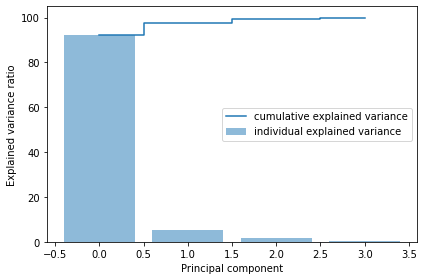

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.bar(range(4), var_exp, 
        alpha=0.5, 
        align='center',
        label='individual explained variance')
plt.step(range(4), cum_var_exp,
         where='mid', 
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')

plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 取出前两个特征值的特征向量

因为前两个特征值占据了整个特征值的接近97%，后两个不重要所以忽略

In [29]:
print('vector_1:\n', type(eig_vecs[:, 0]), '\n', eig_vecs[:, 0])
print('\nvector_2:\n', type(eig_vecs[:, 1]), '\n', eig_vecs[:, 1].reshape(4, 1))

vector_1:
 <class 'numpy.ndarray'> 
 [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]

vector_2:
 <class 'numpy.ndarray'> 
 [[-0.65658877]
 [-0.73016143]
 [ 0.17337266]
 [ 0.07548102]]


In [30]:
matrix_w = np.hstack((eig_vecs[:, 0].reshape(4, 1),
                      eig_vecs[:, 1].reshape(4, 1)))

print('Matrix W:\n', matrix_w.shape)

Matrix W:
 (4, 2)


# 将X_std与matrix_w进行点乘，取出两个数组

In [31]:
Y_PCA = X_std.dot(matrix_w)
print('++++++++')


++++++++


# 未进行主成分分析时的分类图

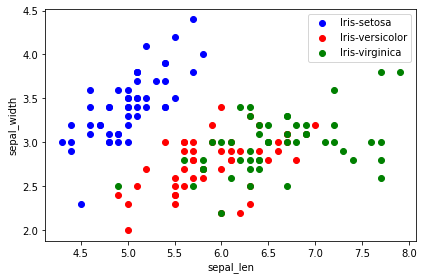

In [32]:
plt.figure(figsize=(6, 4))

for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                    ('blue', 'red', 'green')):
    plt.scatter(X[Y==lab, 0],
                X[Y==lab, 1],
                label = lab,
                c=col)
    
plt.xlabel('sepal_len')
plt.ylabel('sepal_width')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
    
    

# 主成分分析结束后的图

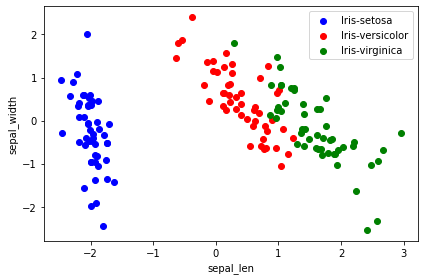

In [33]:
plt.figure(figsize=(6, 4))

for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                    ('blue', 'red', 'green')):
    plt.scatter(Y_PCA[Y==lab, 0],
                Y_PCA[Y==lab, 1],
                label = lab,
                c=col)
    
plt.xlabel('sepal_len')
plt.ylabel('sepal_width')
plt.legend(loc='best')
plt.tight_layout()
plt.show()